In [28]:
import pandas as pd

In [38]:
df = pd.read_csv('threats.csv')
li = [str(i) for i in range(88)]
df = df.dropna(subset=li)


In [39]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [50]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
predictions = dtc.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9959739355257258

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0, 1])

array([[104392,    239],
       [   183,      3]])

In [59]:
from sklearn.metrics import f1_score, roc_auc_score, matthews_corrcoef
print(f1_score(y_test, predictions, average='macro'))
print(f1_score(y_test, predictions, average='micro'))
print(roc_auc_score(y_test, predictions))
print(f1_score(y_test, predictions, average='weighted'))
print(matthews_corrcoef(y_test, predictions))

0.5060007705145249
0.9959739355257258
0.5069224071938219
0.9962367840752918
0.012140936236231392


Shows which feature had how much impact on the splits

In [62]:
feature_names = X.columns
feature_importance = pd.DataFrame(dtc.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
1,0.033463
78,0.029590
80,0.023819
2,0.023341
71,0.023100
...,...
39,0.004106
4,0.003715
87,0.003166
44,0.002668


<Axes: >

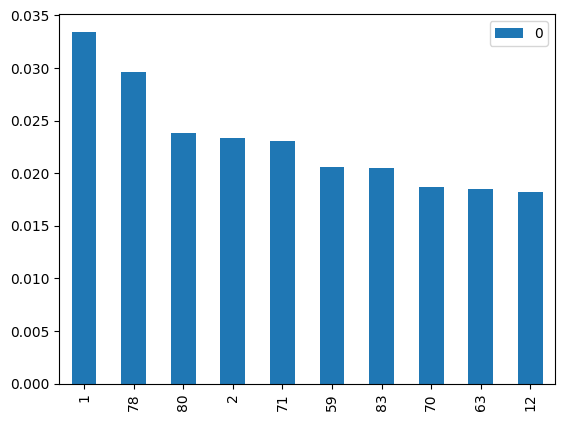

In [63]:
feature_importance.head(10).plot(kind='bar')

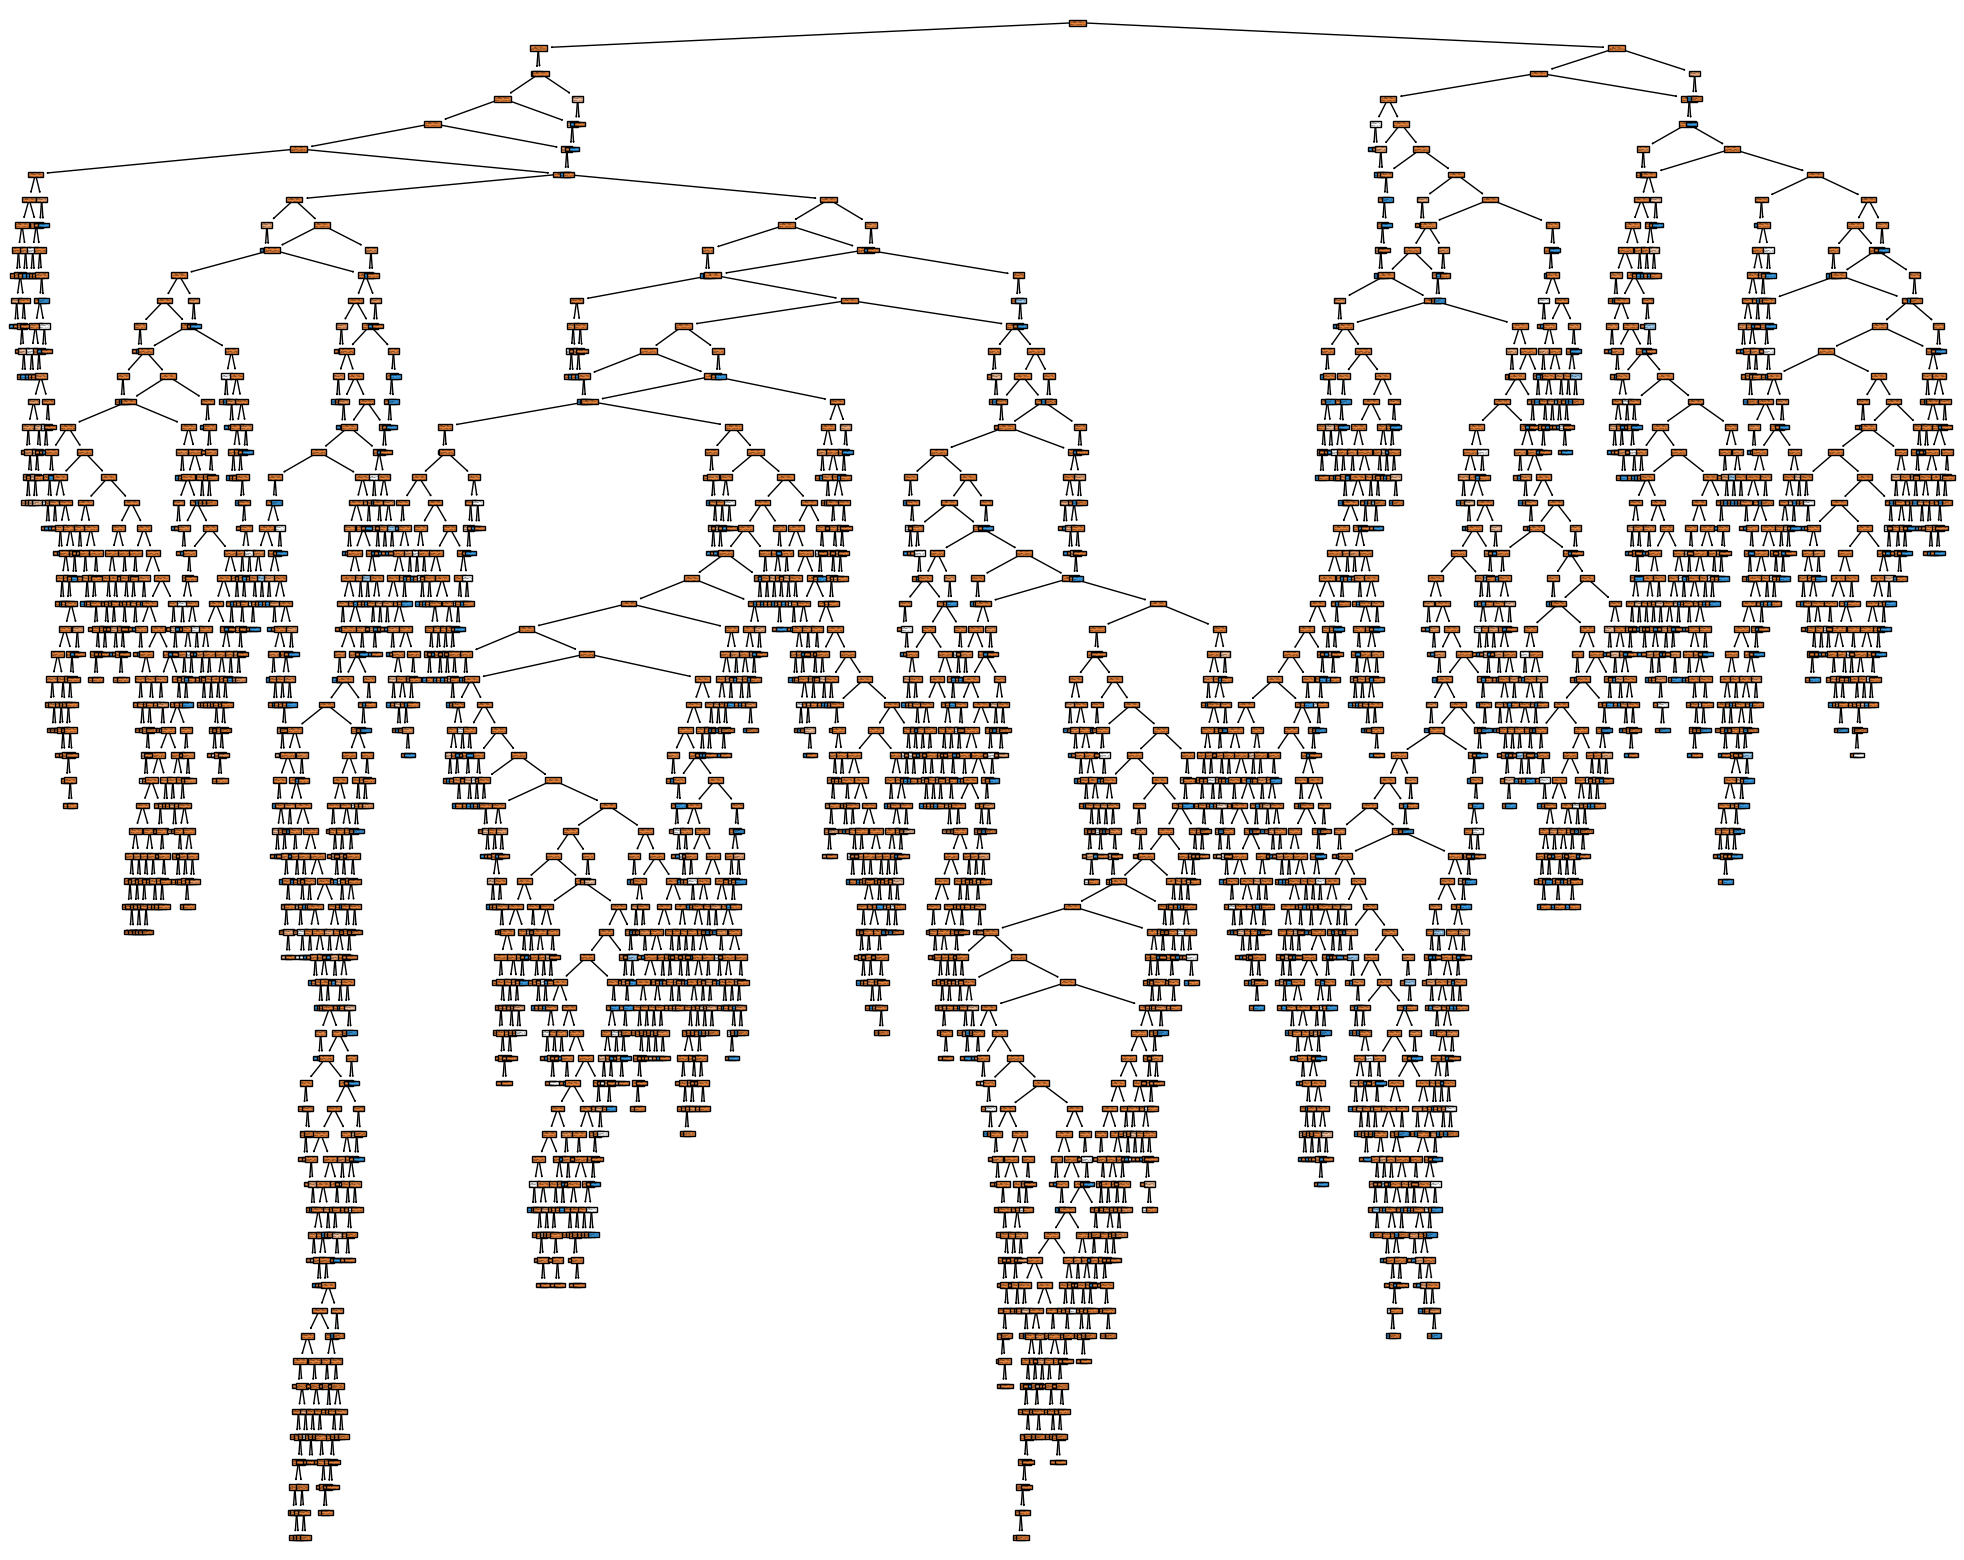

In [64]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc,
                   feature_names=feature_names,
                   filled=True)